In [1]:
%run initlibs.py Lustre dark
from tools.loaders.data_loaders import import_mt5_ohlc_data, load_data, ls_symbols

Now we are ready to import data from csv files and put data into local sqlite3 database for faster access.
Exported data should be located under ../data/{vendor}/ directory.

For exmaple we can use data from different vendors. Now I only have CFD 1Min OHLC from AMP futures provider.

In [8]:
ls ../data/amp

AUS200_M1_201904222200_202105031500.csv.gz
SPXm_M1_201904212200_202105031456.csv.gz


Importing data into sqlite3, database will be created in the ../data/ folder.

In [9]:
import_mt5_ohlc_data('amp')

 >> Inserting AUS200 1Min for [2019-04-22 21:59:00 -> 2021-05-03 15:00:00] ... [OK]
 >> Inserting SPXM 1Min for [2019-04-21 21:59:00 -> 2021-05-03 14:56:00] ... [OK]


We can list symbols anb date ranges we have there

In [10]:
ls_symbols('amp')

AUS200:	2019-04-22 22:00:00 - 2021-05-03 15:00:00
SPXM:	2019-04-21 22:00:00 - 2021-05-03 14:56:00


Now we can load let's say CFD on SP500 data

In [11]:
d = load_data('amp:SPXM')
d1 = load_data('amp:AUS200')

For example 1 min ohlc bars:

In [12]:
d.data('1Min')

,open,high,low,close,volume
time,,,,,
2019-04-21 22:00:00,2905.7,2906.9,2904.9,2906.9,27
2019-04-21 22:22:00,2906.2,2906.2,2906.2,2906.2,1
2019-04-21 22:32:00,2907.1,2907.1,2907.1,2907.1,1
2019-04-21 22:38:00,2911.2,2911.2,2911.2,2911.2,1
2019-04-21 22:39:00,2911.2,2911.2,2909.9,2910.0,3
...,...,...,...,...,...
2021-05-03 14:52:00,4201.3,4201.9,4199.7,4200.2,149
2021-05-03 14:53:00,4200.1,4200.2,4199.2,4199.7,164
2021-05-03 14:54:00,4199.7,4200.9,4199.3,4200.6,160


It's easy to convert them into daily prices

In [13]:
d.data('1d')

,open,high,low,close,volume
time,,,,,
2019-04-21,2905.7,2911.2,2904.9,2908.2,173
2019-04-22,2907.9,2912.9,2896.6,2910.1,6951
2019-04-23,2910.1,2938.0,2904.7,2936.5,8666
2019-04-24,2936.5,2937.3,2926.0,2928.8,9299
2019-04-25,2928.6,2933.6,2912.4,2922.0,7637
...,...,...,...,...,...
2021-04-28,4189.8,4203.3,4182.2,4197.9,41802
2021-04-29,4197.7,4220.0,4177.3,4206.0,55434
2021-04-30,4205.6,4207.6,4176.4,4189.2,67900


We can plot for example daily data as OHLC chart and RSI indicator at the bottom

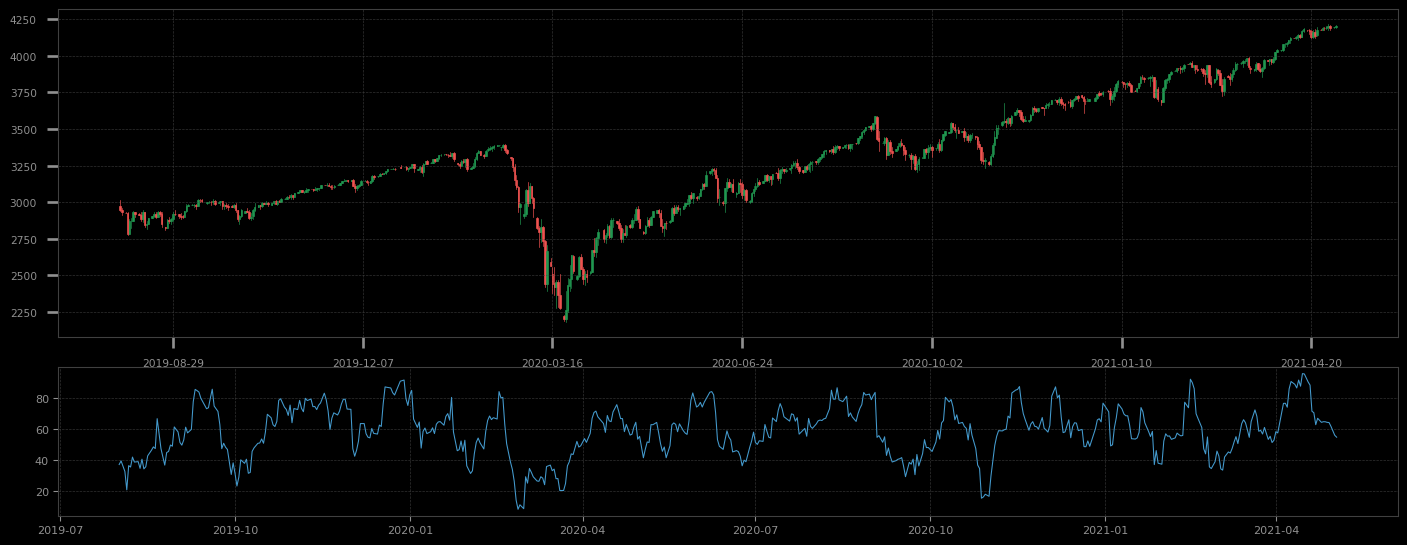

In [25]:
fig(18, 7)
sbp(31,1,r=2); ohlc_plot(d.data('1d')['2019-08':])
sbp(31,3); plt.plot(rsi(d.data('1d').close, 14)['2019-08':]);

For example we can see if AUS200 index's returns have any correlation to SPX500 returns (let's say on 1 hour timeframe)

In [52]:
m1 = scols(d.data('1h').close.pct_change(), d1.data('1h').close.pct_change(), names=['sp','au']).dropna()

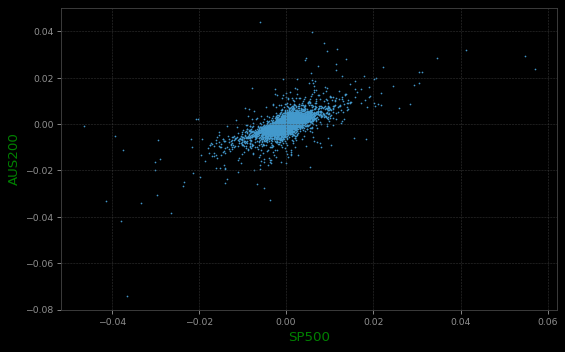

In [53]:
plt.scatter(m1.sp, m1.au, s=1); plt.xlabel('SP500'); plt.ylabel('AUS200');

Yep, looks like they are positively correlated 

In [47]:
m1.corr()

,sp,au
sp,1.000000,0.690385
au,0.690385,1.000000
